In [1]:
import numpy as np
import matplotlib.pyplot as plt
import some_routines as sr

# 3. Linear structure growth

#### Write down the linearized density growth equation for an Einstein-de Sitter Universe and calculate the numerical solution with the following initial conditions

The partial differential equation is
\begin{equation}
\frac{d^2D}{dt^2} + 2\frac{\dot{a}}{a} \frac{dD}{dt} = \frac{3}{2} \Omega_o H_0^2 \frac{1}{a^3}D
\end{equation}


With 
\begin{equation}
a(t) = \left(\frac{3}{2}H_0t \right)^{2/3}
\end{equation}
We have 
\begin{equation}
\dot{a}(t) = \left(\frac{3}{2}H_0 \right)^{2/3} \frac{2}{3}t^{-1/3}
\end{equation}
Thus

\begin{equation}
\frac{\dot{a}(t)}{a(t)} = \frac{2}{3t}
\end{equation}

and the term on the right-hand side can be written as
\begin{equation}
\frac{3}{2} \Omega_0 H_0^2 \frac{1}{a^3} = \frac{2}{3t^2}
\end{equation}
since $\Omega_0 = \Omega_M = 1$ in an Einstein-de Sitter Universe.

Filling in these terms, we get the following partial differential equation:
\begin{equation}\label{eq:ODE}
\frac{d^2D}{dt^2} + \frac{4}{3t} \frac{dD}{dt} = \frac{2}{3t^2} D
\end{equation}

We write this as two first order differential equations by setting $D=z_1(t)$, $\frac{dD}{dt} = z_2(t)$ and $\frac{d^2D}{dt^2} = \frac{d}{dt}z_2(t)$. This gives us the equations
\begin{equation}
\begin{split}
\frac{dz_1(t)}{dt} = z_2(t) \\
\frac{dz_2(t)}{dt} = \frac{2}{3t^2} - \frac{4}{3t} z_2(t)
\end{split}
\end{equation}

We use the 4-th order Runge-Kutta method to solve these two first order ODEs numerically. 


The analytical solution to the ODE in Equation \ref{eq:ODE} can be found by rewriting it and making the ansatz $D(t) \propto t^\alpha$ based on the rewritten form:
\begin{equation}
t^2\frac{d^2D}{dt^2} + t\frac{4}{3} \frac{dD}{dt} = \frac{2}{3} D
\end{equation}
Plugging in this ansatz gives us
\begin{equation}
\begin{split}
\alpha(\alpha-1)t^{\alpha-2}t^2 + \frac{4}{3}\alpha t^{\alpha-1}t -\frac{2}{3}t^\alpha = 0 \\
\alpha(\alpha-1) + \frac{4}{3}\alpha -\frac{2}{3} = 0 \\
\alpha^2+\frac{1}{3}\alpha -\frac{2}{3} = 0 \\
\end{split}
\end{equation}

Which has solutions
\begin{equation}
\begin{split}
\alpha = \frac{-\frac{1}{3} \pm \sqrt{\frac{1}{9}+4\times\frac{2}{3}}}{2} \\
\alpha = -1 \mathrm{\, or \,} \frac{2}{3}
\end{split}
\end{equation}

The solution $D_1 \propto t^{-1}$ is called the decaying mode, as the density fluctuation will decrease with time. The solution $D_2 \propto t^{\frac{2}{3}}$ is then called the growing mode solution. The general solution is thus
\begin{equation}
D(t) = A t^{2/3} + B t^{-1}
\end{equation}
Where $A$ and $B$ are constants given by the initial conditions. In this case we are given $D(1)$ and $D'(1)$, so we also need
\begin{equation}
D'(t) = \frac{2}{3} A t^{-1/3} - B t^{-2} \\
\end{equation}
As such, in the case we are given the initial conditions at $t=1$, we can find $A$ and $B$ from
\begin{equation}
\begin{split}
%D(1) + D'(1) = \frac{5}{3} A \\
A = \frac{3}{5} (D(1) + D'(1)) \\
B = D(1) - A
\end{split}
\end{equation}

In [2]:
def f1(z1, z2, t):
    """returns dz1/dt = dD/dt"""
    return z2

def f2(z1, z2, t):
    """returns dz2/dt = d^2D/dt^2"""
    return 2/(3*t**2)*z1 - 4/(3*t)*z2

def rungekutta(func1, func2, h, endpoint, initial_t, initial_y
               ,initial_y1):
    """
    Solve a second order ODE with 4th order Runge Kutta
    
    func1      -- function that returns dz1/dt given y
    func2      -- function that returns dz2/dt given y
    h          -- stepsize
    endpoint   -- end point 
    initial_t  -- initial value of dependent parameter
    initial_y  -- initial value of function
    initial_y1  -- initial value of derivative of function
    
    """
    t = [initial_t]
    y = [initial_y]
    y1 = [initial_y1] 
        
    amount_steps = int((endpoint-initial_t)/h + 0.5)
    for i in range(0,amount_steps):
        # Four function evaluations to evaluate the new position
        # And four function evaluations to evaluate the new derivative
        k11 = h*func1(y[-1],y1[-1],t[-1]) 
        k21 = h*func2(y[-1],y1[-1],t[-1])
        k12 = h*func1(y[-1]+0.5*k11,y1[-1]+0.5*k21,t[-1]+0.5*h)
        k22 = h*func2(y[-1]+0.5*k11,y1[-1]+0.5*k21,t[-1]+0.5*h)
        k13 = h*func1(y[-1]+0.5*k12,y1[-1]+0.5*k22,t[-1]+0.5*h)
        k23 = h*func2(y[-1]+0.5*k12,y1[-1]+0.5*k22,t[-1]+0.5*h)
        k14 = h*func1(y[-1]+0.5*k13,y1[-1]+0.5*k23,t[-1]+h)
        k24 = h*func2(y[-1]+0.5*k13,y1[-1]+0.5*k23,t[-1]+h)
        
        y.append(y[-1]+(k11+2*k12+2*k13+k14)/6)
        y1.append(y1[-1]+(k21+2*k22+2*k23+k24)/6)   
        t.append(t[-1]+h)

        
    return np.array(t), np.array(y), np.array(y1)
    
    

In [3]:
def analyticalD(D1,Ddt1,t):
    """
    Given initial conditions D(1) and D'(1), returns the analytical
    solution of the linearized density growth equation evaluated at 't'
    """
    A = 3/5 * (D1+Ddt1)
    B = D1 - A
    return A*t**(2/3) + B*t**(-1)


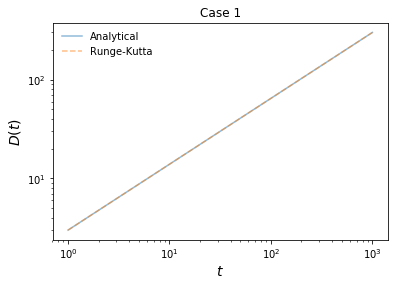

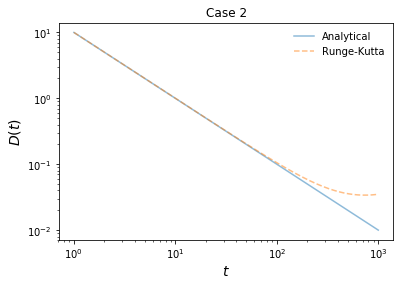

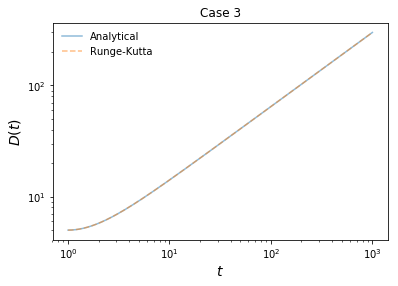

In [8]:
# Initial values
all_D = [3,10,5]
all_dD = [2,-10,0]

# For Case 1, B=0, so there is only a growing mode.
# For Case 2, A=0, so there is only a decaying mode
# For Case 3, Both modes are present
for i in range(3):
    t, D, dDdt = rungekutta(f1,f2,0.001,1000,1,all_D[i],all_dD[i])
    plt.loglog(t,analyticalD(all_D[i],all_dD[i],t)
               ,alpha=0.5,label='Analytical')
    plt.loglog(t,D
               ,alpha=0.5,label='Runge-Kutta',ls='dashed')
    plt.legend(frameon=False)
    plt.xlabel('$t$',fontsize=14)
    plt.ylabel('$D(t)$',fontsize=14)
    plt.title(f"Case {i+1}")
    plt.show()


We can see that the Runge-Kutta integrator performs very well for the first and last case, but struggles to find the correct solution for the second case. We found that very small timesteps make the ODE solver perform better, but as time increases, an increasingly small number of timesteps was needed to perform well. This required too much computation time for a final plot.